In [147]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate 
from scipy import integrate

cos = np.cos
sin = np.sin
pi = np.pi

# Question 1

In [3]:
def simple_integrate(fun,a,b,tol):
    x=np.linspace(a,b,5);
    dx=(b-a)/4.0;
    #np.median(np.diff(x))
    y=fun(x);
    neval=len(x) #let's keep track of function evaluations
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a);
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a);
    myerr=np.abs(f2-f1)
    if (myerr<tol):
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval;
    else:
        mid=0.5*(b+a);
        f_left,err_left,neval_left=simple_integrate(fun,a,mid,tol/2.0);
        f_right,err_right,neval_right=simple_integrate(fun,mid,b,tol/2.0);
        neval=neval+neval_left+neval_right;
        f=f_left+f_right;
        err=err_left+err_right;
        return f,err,neval;

In [113]:
# my improved recursive integartor 
def improve_integrate(func,a,b,tol):
    x = np.linspace(a, b, 5)  
    
    # These guys wont change throughout the recursion so 
    y_a = func(x[0])
    y_b = func(x[4])
    y_mid = func(x[2])
    
    # Number of evaluation (neval sounds so weird...)
    count = 3
    
    # Recursion part of the integration
    ansF, errF, countF = recursion(func, a, b, y_a, y_b, y_mid, count, tol) #calling the recursive function
    return ansF, errF, countF
    
    
def recursion(func, a, b, y_a, y_b, y_mid, count, tol):
    #In case of a new recursion cycle, x will be redistributed and the middle points will need to be recalculated
    x = np.linspace(a, b, 5)
    ##Now when there is a recursion, we need to update 3 values (y_mid, y_midL, y_midR)
    y_mid = func(x[2])
    y_midL = func(x[1])
    y_midR = func(x[3])
    count = 3
        
    ## Now we evaluate f1 and f2:
    f1 = (y_a + 4*y_mid + y_b)/6.0*(b-a)
    f2 = (y_a + 4*y_midL + 2*y_mid + 4*y_midR + y_b)/12.0*(b-a)
    err = np.abs(f1 - f2)
    
    if err>tol:
        mid = (a + b)/2
        ansL, errL, countL = recursion(func, a, mid, y_a, y_mid, y_midL, count, tol/2) 
        ansR, errR, countR = recursion(func, mid, b, y_mid, y_b, y_midR, count, tol/2)
        count = count + countL + countR
        err = errL + errR  
        ans = ansL + ansR
        return ans, err, count
    else:
        ans = (16.0*f2-f1)/15.0
        return ans, err, count

In [219]:
def func1(x):
    return np.cos(x)

In [220]:
f_better, err_better, neval_better = improve_integrate(func1, -1, 2, 1e-3)
f_simple, err_simple, neval_simple = simple_integrate(func1, -1, 2, 1e-3)

In [221]:
neval_better

21

In [222]:
neval_simple

35

# Question 2

In [223]:
mat = np.zeros([5,5])
x = np.linspace(-1, 1, 5)

In [224]:
mat[:,0] = 1
mat[:,1] = x
mat[:,2] = x**2
mat[:,:3]

array([[ 1.  , -1.  ,  1.  ],
       [ 1.  , -0.5 ,  0.25],
       [ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  1.  ,  1.  ]])

0
1
2
3
4


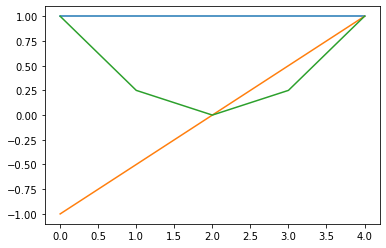

In [225]:
plt.plot(mat[:,:3])
for i in range(5):
    print(i)

# Question 3

In [417]:
def decay(x, y):
    half_life = [1.409e17, 2.082e6, 402, 7.7421e12, 2.377e12, 5.046e10, 
             0.33e6, 186, 1608, 1194, 0.1643, 0.703e9, 1.5815e11, 11.95e6] # in second
    num = len(half_life) + 1
    dydx = np.zeros(num)
    
    for i in range(num):
        if i == 0:
            dydx[0] = -y[0]/half_life[0]
        elif i == num-1:
            dydx[i] = y[i-1]/half_life[i-1]
        else:
            dydx[i] = -y[i]/half_life[i] + y[i-1]/half_life[i-1]
    return dydx

In [437]:
# Value of y
y0 = np.asarray(np.zeros(15))
y0[0] = 1

In [438]:
t0 = 0
t1 = 100
ans = integrate.solve_ivp(decay, [t0, t1], y0, Method = "Randau")

In [439]:
ans.y[0,:] # This is the time evolution of U238

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [440]:
ans.y[4,:] # This is the time evolution of Th230

array([0.00000000e+00, 4.56364852e-57, 6.68163447e-53, 6.92790186e-49,
       6.95255506e-45, 6.95159942e-41, 6.91743118e-37, 4.34669067e-33])

In [441]:
ans.y[-1,:] # This is the time evolution of Pb208

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.95690552e-147,
       7.33604091e-133, 7.34270870e-119, 6.13883503e-105, 3.94515116e-091])

In [442]:
ans.y[:,-1] # This is the decay chain at the final time step

array([ 1.00000000e+00,  7.09706164e-16,  1.57144331e-20,  1.32955931e-21,
        4.34669067e-33,  3.66846969e-44,  1.36494597e-53,  3.36978955e-58,
        9.11995612e-60,  1.99722530e-62,  8.83514636e-62, -8.83062734e-62,
        2.07790889e-71, -1.98620835e-83,  3.94515116e-91])